In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/stacking/titanic.csv')

In [3]:
df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df["Name_length"] = df["Name"].apply(lambda x: len(x))

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,21
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,28
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,40
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,21


In [8]:
b = df["Cabin"].notna()
df["Has_Cabin"] = b.apply(lambda x: 'Vrai' if x == True else 'Faux')

In [9]:
def get_name(name):
    return name.split(', ')[0]

In [10]:
df['FamilySize'] = (df['SibSp'] + df["Parch"] +1)

In [11]:
def get_title(titre):
    return titre.split(', ')[1].split('.')[0]

In [12]:
df['Title'] = df['Name'].apply(get_title)

In [13]:
px.bar(df, 'Title')

In [14]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
px.bar(df, 'Title')


In [15]:
df['Title'] = df['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'].value_counts()
px.bar(df, 'Title')

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Has_Cabin,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,Faux,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,Vrai,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,Faux,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,Vrai,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,Faux,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,21,Faux,1,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,28,Vrai,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,40,Faux,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,21,Vrai,1,Mr


In [17]:
a = df["SibSp"]
df["IsAlone"] = a.apply(lambda x: 'Vrai' if x == 0 else 'Faux')

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Has_Cabin,FamilySize,Title,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,Faux,2,Mr,Faux
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,Vrai,2,Mrs,Faux
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,Faux,1,Miss,Vrai
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,Vrai,2,Mrs,Faux
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,Faux,1,Mr,Vrai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,21,Faux,1,Rare,Vrai
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,28,Vrai,1,Miss,Vrai
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,40,Faux,4,Miss,Faux
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,21,Vrai,1,Mr,Vrai


In [19]:
df = df.drop(['Name', 'Ticket', 'Cabin', 'SibSp'], axis=1)

In [20]:
df

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,Title,IsAlone
0,1,0,3,male,22.0,0,7.2500,S,23,Faux,2,Mr,Faux
1,2,1,1,female,38.0,0,71.2833,C,51,Vrai,2,Mrs,Faux
2,3,1,3,female,26.0,0,7.9250,S,22,Faux,1,Miss,Vrai
3,4,1,1,female,35.0,0,53.1000,S,44,Vrai,2,Mrs,Faux
4,5,0,3,male,35.0,0,8.0500,S,24,Faux,1,Mr,Vrai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,13.0000,S,21,Faux,1,Rare,Vrai
887,888,1,1,female,19.0,0,30.0000,S,28,Vrai,1,Miss,Vrai
888,889,0,3,female,NaN,2,23.4500,S,40,Faux,4,Miss,Faux
889,890,1,1,male,26.0,0,30.0000,C,21,Vrai,1,Mr,Vrai


In [21]:
target_name = 'Survived'
Y = df.loc[:,target_name]
X = df.drop(target_name, axis = 1)

In [22]:
numeric_features = ['Pclass', 'Age', 'Parch', 'Fare', 'Name_length', 'FamilySize']
categorical_features = ['Sex', 'Embarked', 'Has_Cabin', 'IsAlone', 'Title'] 

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [24]:
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer()), 
    ('scaler', StandardScaler())
])

In [25]:
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(drop='first'))  
])

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [27]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [28]:
corr = pd.DataFrame(X_train).corr().round(2)

<AxesSubplot: >

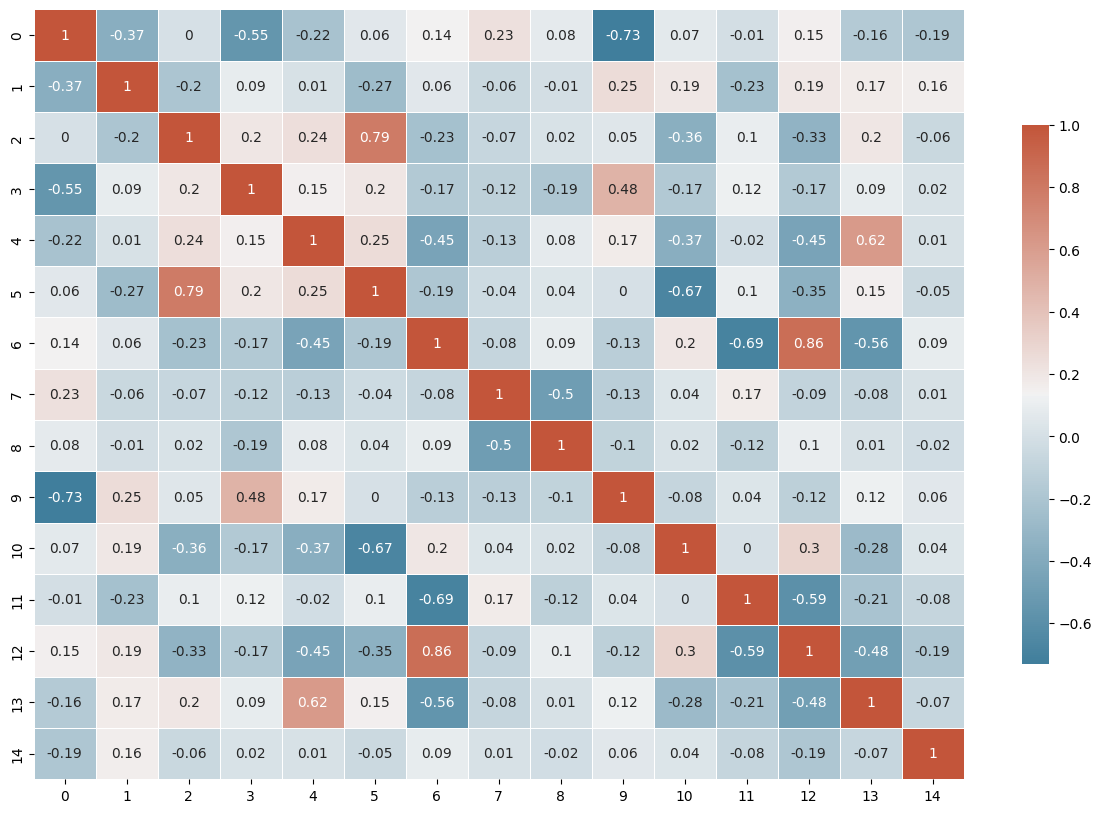

In [29]:
f, ax = plt.subplots(figsize=(15, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, cbar_kws={"shrink": .7}, linewidths=.5)

In [36]:
foret_classi = RandomForestClassifier()
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf' : [1, 2, 5],
    'min_samples_split': [2, 4, 8],
    'n_estimators':  [10, 20, 40, 60, 80, 100]
}

gridsearch = GridSearchCV(foret_classi, param_grid = params)
gridsearch.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 40, 60, 80, 100]})

In [40]:
print("Best hyperparameters : ", gridsearch.best_params_)
print("validation accuracy : ", gridsearch.score(X_train, Y_train))
print("best validation accuracy : ", gridsearch.best_score_)
print("validation accuracy : ", gridsearch.score(X_test, Y_test))

Best hyperparameters :  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 10}
validation accuracy :  0.8679775280898876
best validation accuracy :  0.8356150891362158
validation accuracy :  0.8100558659217877


In [43]:
scores = pd.DataFrame()
scores = scores.append({'model': 'Random Forest', 'accuracy': gridsearch.score(X_train, Y_train), 'set': 'train'}, ignore_index=True)
scores = scores.append({'model': 'Random Forest', 'accuracy': gridsearch.score(X_test, Y_test), 'set': 'test'}, ignore_index=True)


In [44]:
scores

,model,accuracy,set
0,Random Forest,0.867978,train
1,Random Forest,0.810056,test
